Nikki La

DAT 301

Professor Eikenberry


# Introduction

The COVID-19 pandemic has had a huge impact on everyone. People's lives were drastically altered in every way. To stop the virus from spreading, people were advised to self-quarantine in their houses. The mental health consequences of the lockdown and quarantine were severe, resulting in psychological issues such as frustration, stress, and depression.

With the collapse of educational institutions, the shift from in-person classes to online learning happened quickly. As a result, 1.5 billion students around the world were denied access to basic education (Chaturvedi et al. 2020). This had major psychological consequences for health. Changes in daily routine included a lack of outdoor activities, disrupted sleeping patterns, and social distancing (Chaturvedi et al. 2020).

Because I was personally influenced by COVID-19, I choose to work on a project that focuses on students and educational changes. COVID-19 first appeared when I was a senior in high school and faded away by the time I was a sophomore in college. As a result, I feel it is critical to address the mental situations of students of all ages by examining their sleeping habits, fitness routines, social supports, changes in weight, etc. 


# Dataset

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import geopandas as gpd
import seaborn as sns

The Kaggle website provided this data on COVID-19 and its impact on students. The dataset is called "COVID-19 Survey Student Responses.csv". It specifically looks at a sample size of 1182 students of different age groups from different educational institutions in the Delhi National Capital Region (NCR) and areas outside of this region. There are 1182 rows and 19 columns. This dataset is fairly sizable dataset. 

The columns include: region of residence, age, time spent in online classes, rating of online class experience, the medium for online class, time spent on self study, time on fitness, time on sleep, time on social media, time on tv, their preferred social media platform, number of meals, if their weight increased or decreased, stress busters, health issues, time utlized, what they miss most, and if they got closer with those around them. 

Below I imported the packages, the dataset, and also adjusted some of the columns. All the columns are organized cleanly except the column that focuses on the time spent on TV and the column that looks into preferred social media platforms. There were some outliers like 'No tv', 'n', 'N', and ' ', so to make it easier. I converted all of these into 0. The preferred social media platform duplicates 'WhatsApp' and 'None' due to some formatting issues. The column: ''Do you find yourself more connected with your family, close friends , relatives  ?' was also renamed so that it could be easily used when plotting.

Most importantly, I made a new dataset that deletes the area out of Delhi-NCR. So that the data used was more specific to Delhi National Capital Region. Since I want to only focus on students that were in the Delhi National Capital Region.

In [2]:
covid_df = pd.read_csv("COVID-19 Survey Student Responses.csv")
covid_df.head()

covid_df['Prefered social media platform'].replace('Whatsapp', 'WhatsApp', inplace = True)
covid_df['Prefered social media platform'].replace('None ', 'None', inplace = True)

covid_df['Time spent on TV'].replace('n', 0, inplace = True)
covid_df['Time spent on TV'].replace('No tv', 0, inplace = True)
covid_df['Time spent on TV'].replace('N', 0, inplace = True)
covid_df['Time spent on TV'].replace(' ', 0, inplace = True)
covid_df['Time spent on TV'] = covid_df['Time spent on TV'].astype('float')

covid_df.rename(columns = {'Do you find yourself more connected with your family, close friends , relatives  ?': 'Connection'},
               inplace = True)

In [3]:
Delhi_1 = covid_df.loc[covid_df["Region of residence"] == "Delhi-NCR"]

In [4]:
# Population used is 721
len(Delhi_1)

721

# Exploratory Visualizations 

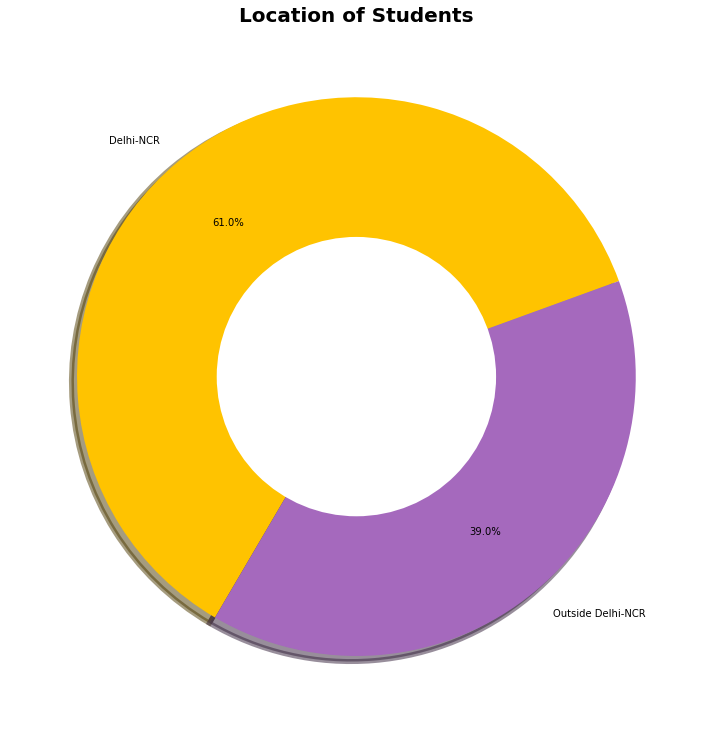

In [5]:
plt.figure(figsize=(10,10))

total_data = covid_df['Region of residence'].value_counts().to_dict()

colors = ['#FFC300','#A569BD']
plt.pie(x=total_data.values(), colors = colors, startangle = 20,
        labels=total_data.keys(), autopct='%1.1f%%', shadow = True,
        pctdistance=0.72, wedgeprops = {'linewidth': 5})

center_circle = plt.Circle((0,0),0.50,fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)

plt.tight_layout()
plt.title("Location of Students", weight = 'bold', fontsize = 20)

plt.show()

This pie chart was provided to display the locations of the students in the dataset. This pie chart was included to highlight that a large portion of the dataset comprised students who did not live in the Delhi-NCR area. (As my project is solely focused on students in the Delhi-NCR region).

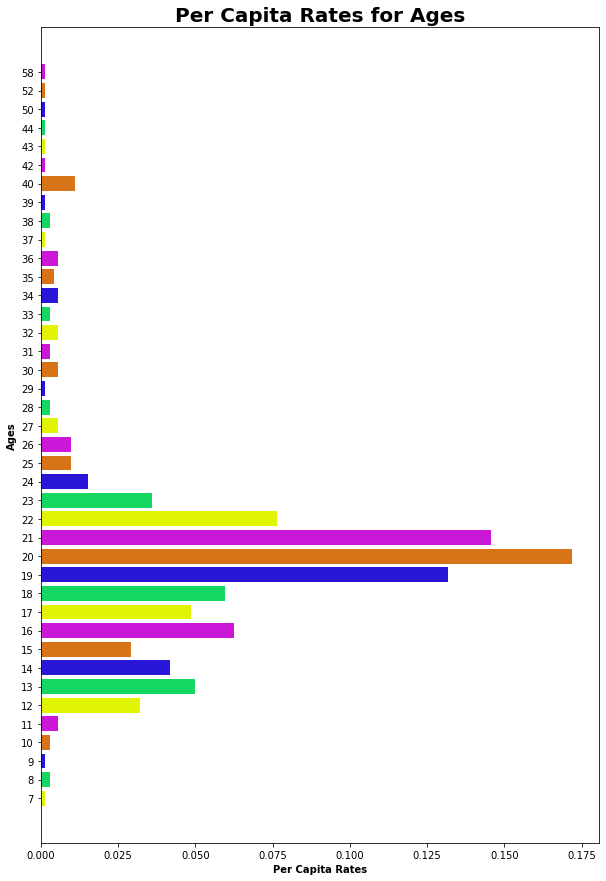

In [6]:
Ages = ['7', '8', '9', '10', '11', '12', 
        '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', 
       '25', '26', '27',  '28', '29', '30',
       '31', '32', '33', '34', '35', '36',
        '37', '38', '39', '40', '42','43',  '44', '50', '52', '58']
Values = [1/721, 2/721,1/721, 2/721, 4/721,23/721,
       36/721, 30/721, 21/721, 45/721, 35/721, 43/721,
       95/721, 124/721, 105/721,55/721, 26/721, 11/721,
       7/721, 7/721,4/721, 2/721, 1/721, 4/721,
       2/721, 4/721, 2/721, 4/721, 3/721, 4/721, 1/721, 2/721,
          1/721,  8/721, 1/721, 1/721, 1/721, 1/721, 1/721, 1/721]
plt.figure(figsize=(10,15))
y_pos = np.arange(len(Ages))
plt.barh(y_pos, Values, color = ['#E2F406', '#17D763', '#2817D7', '#D77417', '#CB17D7'])
plt.yticks(y_pos, Ages)
plt.ylabel('Ages', weight = 'bold')
plt.xlabel('Per Capita Rates', weight = 'bold')
plt.title("Per Capita Rates for Ages", weight = 'bold', fontsize = 20)

plt.show()

The barplot above provides a per capita of the student ages in Delhi-NCR. We see higher rates between the age ranges of about 12 years old to 23 years old. With it peaking at age 20.

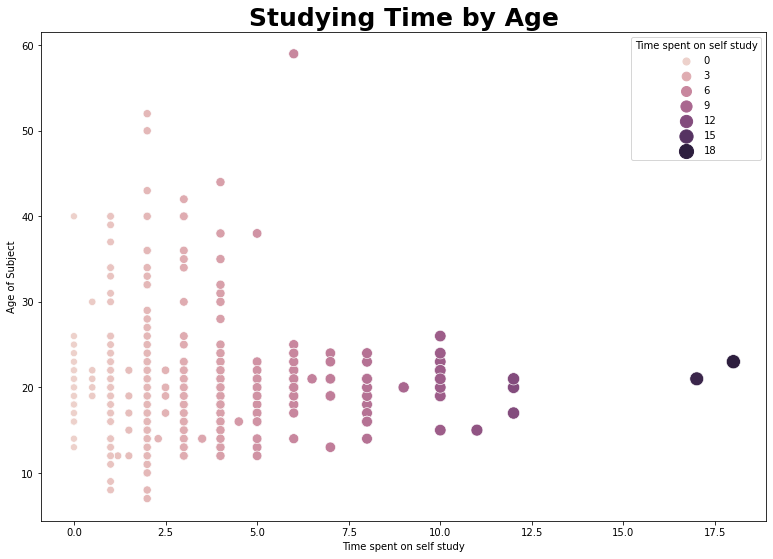

In [7]:
plt.figure(figsize=(13,9))
sns.scatterplot(data = Delhi_1, y = 'Age of Subject', x = 'Time spent on self study', 
                size = 'Time spent on self study',
                hue = 'Time spent on self study', sizes = (50,200))
plt.title("Studying Time by Age", weight='bold', fontsize = 25)
plt.show()

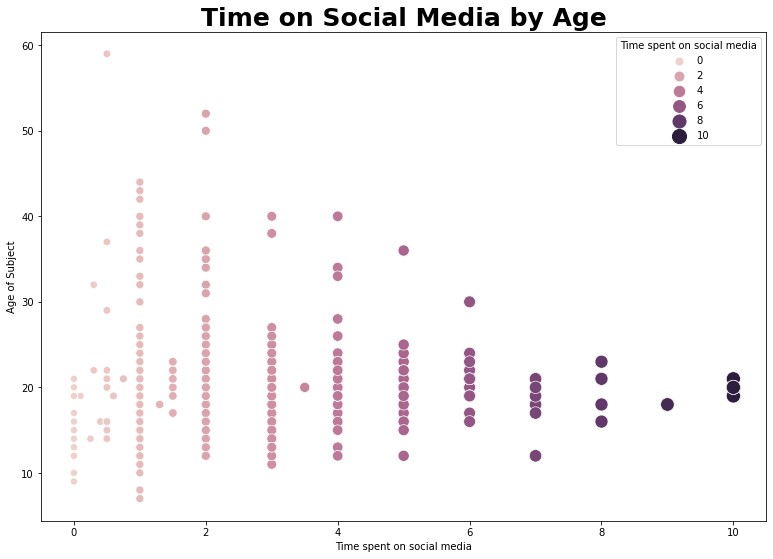

In [8]:
plt.figure(figsize=(13,9))
sns.scatterplot(data = Delhi_1, y = 'Age of Subject', x = 'Time spent on social media', 
                size = 'Time spent on social media',
                hue = 'Time spent on social media', sizes = (50,200))
plt.title("Time on Social Media by Age", weight='bold', fontsize = 25)
plt.show()

I have included two different scatterplots above. From the first scatterplot we see that students around the age of 15-25 spent the most time on studies. With the heighest study time around 17 hours. The second scatterplot shows the time spent on social media compared to age. Students ages 13-25 spend the most time on social media. With the highest time spent on social media at about 10 hours. 

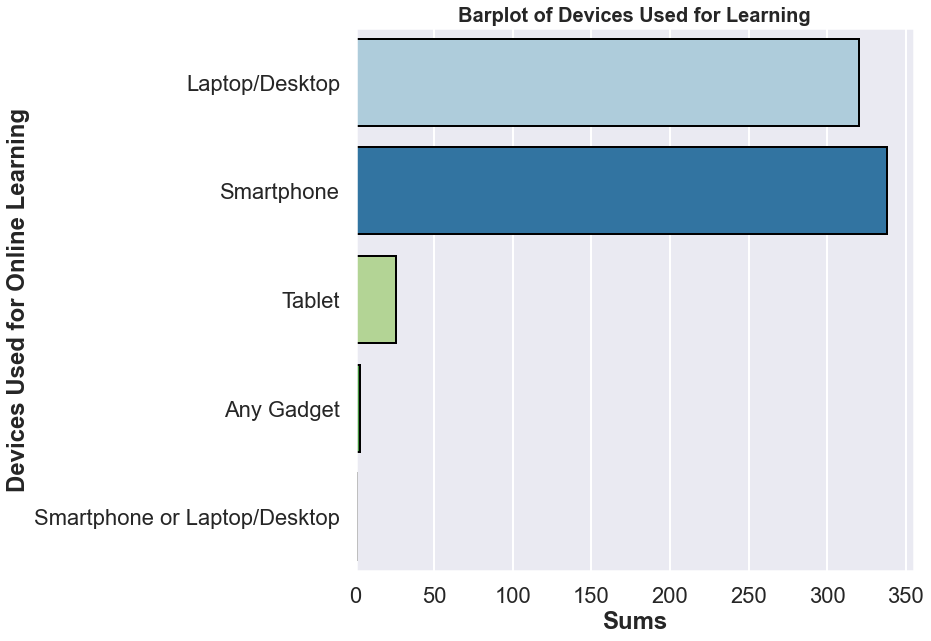

In [9]:
plt.figure(figsize=(10, 10))
sns.set(style='darkgrid')
sns.set_context("poster")
sns.countplot(data = Delhi_1, y = 'Medium for online class', palette = 'Paired', 
              edgecolor = 'black', linewidth = 2)

plt.ylabel('Devices Used for Online Learning', weight = 'bold')
plt.xlabel('Sums', weight = 'bold')
plt.title("Barplot of Devices Used for Learning", weight = 'bold', fontsize = 20)

plt.show()

The count plot above shows that most students used a laptop/desktop and a smartphone to attend to their classes. 

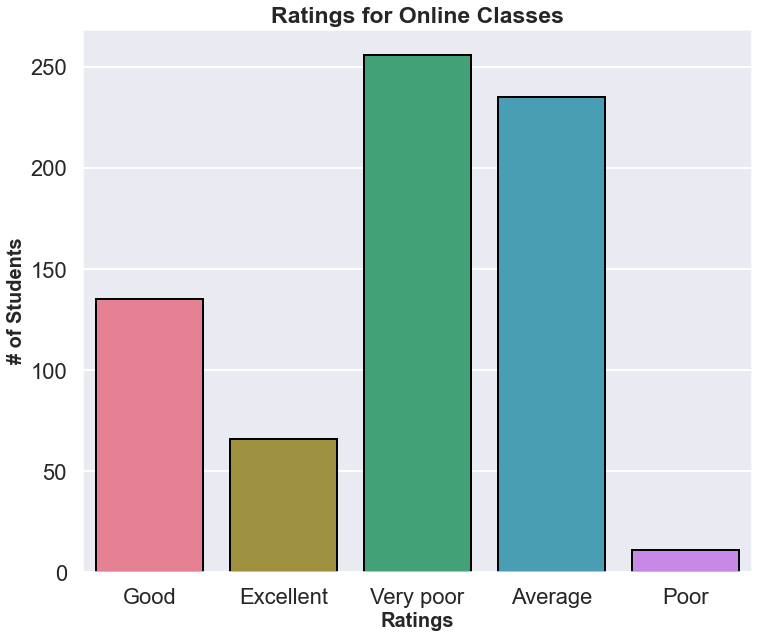

In [10]:
plt.figure(figsize=(12, 10))
sns.set(style = 'darkgrid')
sns.set_context("poster")
sns.countplot(data = Delhi_1, x = 'Rating of Online Class experience', palette = 'husl', 
              edgecolor = 'black', linewidth = 2)

plt.ylabel('# of Students', weight = 'bold', fontsize = 20)
plt.xlabel('Ratings', weight = 'bold', fontsize = 20)
plt.title("Ratings for Online Classes", weight = 'bold', fontsize = 23)

plt.show()

From this count plot we see that most students stated that their online classes were very poor. With this, we see that online that students do not really enjoy online classes. We can conclude that students most likely need to be in an actual learning environment to enjoy learning. 

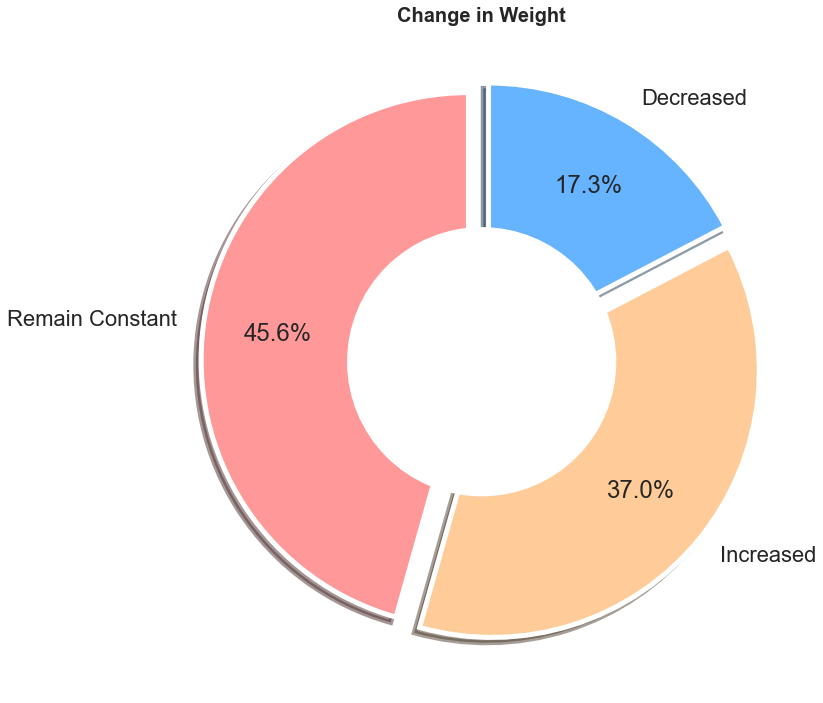

In [11]:
plt.figure(figsize=(12,10))

social_media = Delhi_1['Change in your weight'].value_counts().to_dict()

colors = ['#ff9999','#ffcc99','#66b3ff']
plt.pie(x=social_media.values(), colors = colors, startangle = 90,
        labels=social_media.keys(), autopct='%1.1f%%', 
        explode = (0.05,0.05,0.05), shadow = True,
        pctdistance=0.72, wedgeprops = {'linewidth': 5})

center_circle = plt.Circle((0,0),0.50,fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)

plt.tight_layout()
plt.title("Change in Weight", weight = 'bold', fontsize = 20)

plt.show()

From this pie chart, we see that 45.6% of students in Delhi-NCR had a weight that remained constant, 37.0% of students had a weight that increased, and 17.3% of students had a weight decrease. 

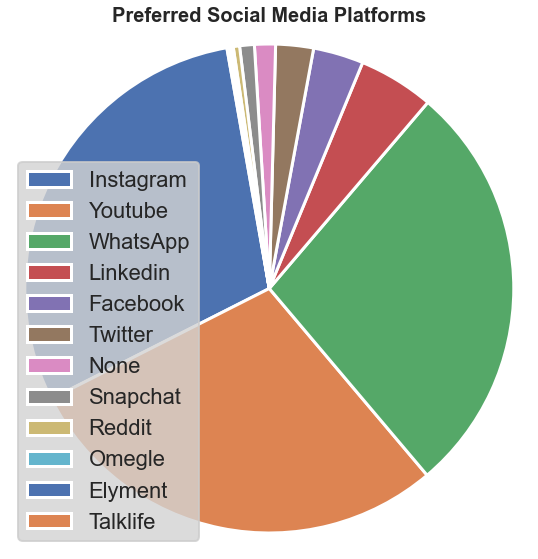

In [12]:
plt.figure(figsize=(8,8))
social_media = Delhi_1['Prefered social media platform'].value_counts().to_dict()
plt.pie(x=social_media.values(), startangle = 100, wedgeprops = {'linewidth': 3})

plt.legend(labels=social_media.keys(), 
           facecolor = 'lightgray', loc = 'lower left')
plt.axis('equal')
plt.tight_layout()
plt.title("Preferred Social Media Platforms", weight = 'bold', fontsize = 20)
plt.show()

With the pie chart, we see that students mostly used Instagram, Youtube, and WhatsApp. As these three sections take up a large portion of the pie chart. This is not out of the ordinary as these forms of social media have always really been popular.

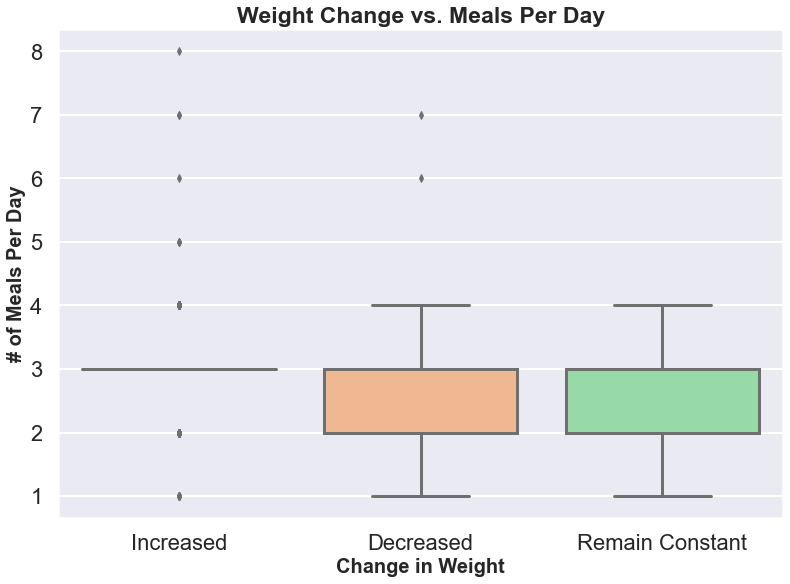

In [13]:
plt.figure(figsize=(13,9))
sns.boxplot(data = Delhi_1, x = 'Change in your weight',
            y = 'Number of meals per day', palette = 'pastel')

plt.title("Weight Change vs. Meals Per Day", weight= 'bold', fontsize = 23)
plt.ylabel('# of Meals Per Day', weight = 'bold', fontsize = 20)
plt.xlabel('Change in Weight', weight = 'bold', fontsize = 20)
plt.show()

The boxplot above shows that students most commonly ate around 2-3 meals a day. Those who typically ate 2-3 meals a day either had a weight decrease or remained constant. While students who had a weight increase ate anywhere between 1-8 times a day. 

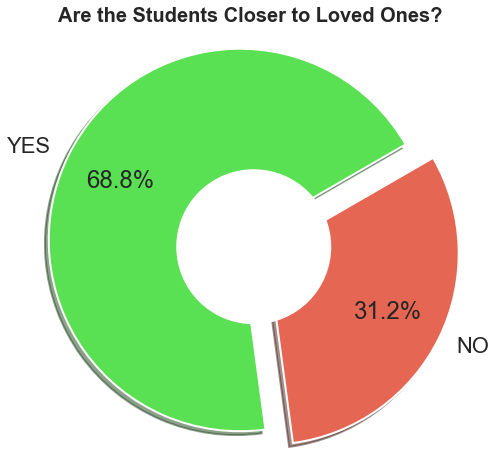

In [14]:
plt.figure(figsize = (8,8))
connection_data = Delhi_1['Connection'].value_counts().to_dict()
explode = [0.08, 0.08]

plt.pie(x = connection_data.values(), labels = connection_data.keys(), autopct='%1.01f%%', pctdistance=0.7, 
        explode = explode, shadow = True, startangle=30, colors = ['#5AE053', '#E56652'])

center_circle = plt.Circle((0,0),0.40,fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)

plt.title("Are the Students Closer to Loved Ones? ", weight = 'bold', fontsize = 20)
plt.axis('equal')
plt.show()

With this pie chart, it is noticeable that many students became closer with their loved ones. As 68.8% are now closer to their loved ones compared to 31.2% who are not closer to their loved ones. 

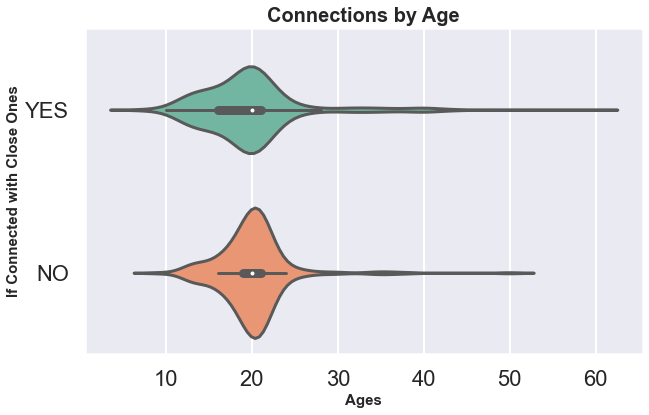

In [15]:
plt.figure(figsize=(10,6))

sns.violinplot(data=Delhi_1, y='Connection', 
               x='Age of Subject', palette = 'Set2')

plt.title("Connections by Age", weight= 'bold', fontsize = 20)
plt.ylabel('If Connected with Close Ones', weight = 'bold', fontsize = 15)
plt.xlabel('Ages', weight = 'bold', fontsize = 15)
plt.show()

The violin plot is included to show that students that did and did not get closer with their loved ones had a median of about age 20. A there was a higher probability for both yes and no around the 10-25 range. They both had a lower probability as the age got older. 

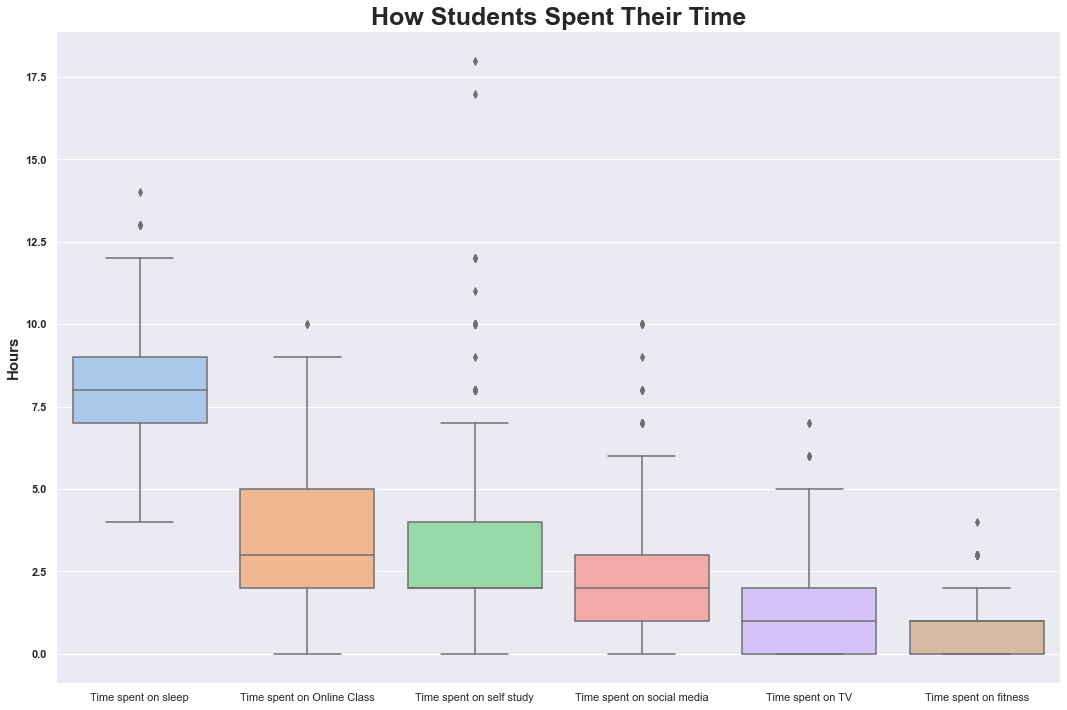

In [16]:
plt.figure(figsize=(18,12))
sns.set_context("notebook")
sns.boxplot(data=Delhi_1[['Time spent on sleep', 'Time spent on Online Class', 'Time spent on self study',
                          'Time spent on social media', 'Time spent on TV', 'Time spent on fitness']],
            orient='v', palette='pastel')
plt.yticks(weight='bold')
plt.title("How Students Spent Their Time", weight= 'bold', fontsize = 25)
plt.ylabel('Hours', weight = 'bold', fontsize = 15)
plt.show()

The boxplot above accurately depicts how students spend their time. Students appear to have spent the most time sleeping. This is logical given that the recommended amount of sleep for teenagers is approximately 8 hours. Online classes last about 2.5 to 5 hours on average. When it comes to self-study time, the average is around 3 hours. On the boxplot for self-study, we also notice a lot of outliers. Self-studying had outliers up to 17.5 hours. The average amount of time spent on social media is roughly 2 hours. And few people devoted time to both television and exercise.

# Conclusion

The goal of this project was to use visualizations and exploratory analysis to determine the effects of COVID-19 on students in Delhi-NCR. To do so, I examined evidence presented by a variety of students. With all of this data, I discovered that there was a major impact on the mental health, education, and daily routine of various students in the Delhi-NCR region. We can observe that it is primarily focused on individuals between the ages of 15 and 25 based on the age range (which focuses most likely on high school, university, and college students). I saw that students' time is warped because COVID-19 prevents them from truly enjoying their daily lives. As we see that sleeping habits, daily fitness routines, and social interactions greatly influenced one's health conditions. I also discovered that students primarily used Instagram, Youtube, and WhatsApp. This is not unusual, given the prevalence and popularity of these social media platforms. 

In conclusion, while COVID-19 has passed its peak, actions to assist students may have been handled more seriously. To ensure effective mental health support for varied student populations, guidelines could have been better developed. If another pandemic occurs in the future, the government should use COVID-19's effects as a model for how to appropriately alter future systems so that students receive greater assistance in times of need.

# Links

https://www.kaggle.com/datasets/kunal28chaturvedi/covid19-and-its-impact-on-students

https://www.researchgate.net/publication/347935769_COVID-19_and_its_impact_on_education_social_life_and_mental_health_of_students_A_Survey